<a href="https://colab.research.google.com/github/gio-bis/MLPNS2021/blob/main/gio-bis/MLPNS2021/Clustering/clusteringGenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pandas as pd
import pylab as pl
import sklearn as skl
from sklearn import cluster
import scipy as sp
from scipy import spatial
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")
np.set_printoptions(precision=2)
rcParams['figure.figsize'] = 10, 10


Populating the interactive namespace from numpy and matplotlib


In [69]:
genes = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW10/kidpackgenes.csv")

In [70]:
genes.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
0,1,-0.146342,-0.520637,0.175828,-0.323736,0.172691,0.025156,0.024812,0.172268,0.207188,0.026710,0.370241,0.390749,-0.103504,0.100439,-0.375930,0.277828,-0.130996,-0.009923,-0.399163,-0.127337,0.234942,0.628659,0.032232,-0.051522,0.322164,0.677058,0.626976,-0.075533,0.105881,0.121000,0.544208,0.126653,0.214285,0.426416,-0.385641,0.018007,0.407190,-0.175330,-0.033392,-0.056588,0.380069,0.247337,-0.160898,0.362272,0.190525,0.101010,1.280034,-0.137223,0.013790,0.284715,-0.080554,0.077708,0.071853,-0.225874,-0.148424,-0.104276,0.427028,0.331856,0.167732,-0.576949,0.007349,-0.002330,0.168953,-0.122312,0.240705,-0.347746,-0.001797,-0.260594,0.105968,0.110885,-0.006975,0.550118,0.118934,0.327248
1,2,-0.465767,0.155823,0.226344,-0.547542,0.041096,0.137012,0.102497,-0.034277,0.500871,0.005533,0.394116,0.474481,-0.004962,0.828600,-0.458895,0.002399,-0.237577,-0.135808,-0.470168,0.088704,-0.039030,0.598749,0.216180,-0.086335,0.509942,0.741002,0.819442,-0.287630,0.253042,-0.122267,0.048518,0.164557,0.208869,0.351322,-0.096956,0.158479,0.566782,-0.171814,0.187912,0.103039,0.605204,-0.010693,0.145773,0.431635,0.408843,0.049612,0.873300,-0.445282,0.050207,0.102510,-0.438553,-0.000697,-0.232677,-0.684507,-0.138210,-0.265029,0.036734,0.474339,0.096666,-0.672424,-0.022295,0.094897,-0.123030,-0.382857,0.371435,-0.447105,-0.134904,-0.250699,0.164698,-0.035022,0.250384,0.463746,-0.514230,0.200956
2,3,-0.088964,-0.208241,-0.151039,-0.288229,-0.425568,0.121006,-0.097883,-0.007597,0.329636,-0.222495,0.102853,0.078648,-0.175050,0.064488,-0.243920,-0.036435,-0.815732,-0.094098,-0.786828,-0.497140,-0.211386,0.249518,0.195911,-0.136115,-0.079168,0.461258,0.268629,0.075221,0.447445,-0.380212,-0.127944,-0.514944,0.204084,-0.132934,-0.717559,-0.723766,-0.009187,-0.026201,-0.428314,-0.243215,0.017108,0.199045,0.335860,-0.070557,0.296754,-0.147136,0.479280,-0.445308,0.173236,0.198668,-0.086679,-0.161494,0.043638,-0.115692,-0.020515,-0.035825,0.120870,0.474513,0.061214,-1.124604,0.085298,-0.160597,-0.223782,0.135259,-0.014990,-0.458297,-0.050852,-0.168500,0.078716,-0.032231,-0.116947,-0.199880,-0.415793,-0.032004
3,4,-0.327696,-1.714948,0.068710,-0.168257,-0.471577,0.279013,-0.060734,-0.222574,0.658097,0.129876,0.531540,-0.109510,-0.178851,0.007126,-0.341273,-0.601923,-0.239953,0.307493,-0.264719,-0.105008,0.587365,0.220183,-0.380904,0.073614,0.082134,0.554048,0.300248,0.479317,0.110226,0.060817,0.080991,-0.165642,-0.327310,0.542784,-0.053313,-0.447296,0.701035,0.282916,0.272387,-0.124356,-0.091246,0.121123,-0.091694,0.174790,0.327808,1.024205,0.471022,0.087155,0.398634,-0.053726,0.354639,0.034264,0.684986,0.314253,0.181046,-0.273637,0.234412,0.066505,0.104653,-0.230860,0.074711,0.066029,0.276241,-0.331959,0.153765,-0.140409,-0.119515,-0.289881,0.944493,-0.142710,-1.119866,-0.215536,0.345946,0.056442
4,5,-0.092327,-0.660456,0.075948,-0.646501,-0.046137,-0.010305,0.368476,-0.043832,-0.321060,0.116657,0.345860,0.282539,-0.077624,0.826049,-0.136295,-0.686548,-0.580715,0.037365,-0.106896,0.196168,0.201661,0.180436,0.052139,-0.001053,0.152552,0.365342,0.462115,-0.155553,0.239003,-0.231050,0.629987,0.020532,0.063029,-0.981387,-0.280845,-0.164185,0.846567,-0.399580,0.340091,0.044768,0.334025,0.032647,0.466371,-0.118516,0.665676,0.443797,0.474259,-0.349966,0.100411,-0.265844,-0.333114,0.914200,-0.088706,-0.457485,-0.046669,0.171069,0.127423,0.483766,0.607528,-1.412080,-0.281975,0.080899,0.855141,-0.487761,-0.033032,0.394082,0.173515,-0.194819,0.149131,-0.097285,-0.288192,-0.491920,-0.722120,0.055477


In [71]:
genes.tail()

,Unnamed: 0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,48,49,50,51,52,55,56,57,58,60,61,64,65,66,68,69,72,73,74,75,76,77,78,79,81,83,84,85,86,87
4219,4220,-0.314408,0.131512,-0.049018,-0.674385,-0.289890,0.258422,-0.120400,-0.060359,0.706799,-0.326422,-0.380340,-0.368913,0.931502,-1.016158,-0.981808,-0.071584,-0.573209,-0.028650,-0.317049,0.418632,-0.233472,-0.538409,0.363460,-0.384606,-0.167610,-0.293465,-0.286218,-0.446162,0.248994,-0.438437,-0.467668,-0.041652,-0.026247,0.081154,0.435343,1.033418,-0.559874,-0.171956,-0.242801,0.544847,-0.148543,-0.878409,-0.258485,-0.033555,0.084417,-0.388476,0.142540,-0.620232,-0.558445,0.194727,-0.473436,-0.166349,-0.053835,-0.395323,-0.442651,-0.256167,-0.368252,-0.071705,-0.877797,-0.318022,0.382826,-0.458879,0.839517,0.009461,0.379001,0.009101,-0.182293,-0.270911,-0.434925,-0.031925,1.402160,0.502573,-0.061042,-0.206210
4220,4221,-0.313823,-0.041095,-0.049798,-0.492502,-0.223146,0.172682,-0.164426,0.033539,0.420965,-0.180468,-0.112523,-0.381056,0.760173,-0.024906,-0.688677,-0.515357,-0.700269,-0.034427,-0.225767,0.202414,-0.208466,-0.000793,-0.064705,-0.307689,-0.306335,-0.391340,-0.462373,-0.276149,0.148468,-0.319296,-0.216960,0.114363,-0.026937,0.070962,0.236805,0.822351,-0.311090,0.007215,-0.364885,0.017317,-0.170069,-0.552263,-0.067118,0.049405,-0.378010,-0.301733,-0.174748,-0.189049,-0.483741,0.060192,-0.379339,-0.380877,-0.364083,-0.280015,-0.408077,-0.047049,-0.297752,-0.124044,-0.513821,0.164431,0.399220,-0.233568,0.386740,-0.193878,0.086748,0.198886,-0.167620,-0.336774,0.022460,-0.211773,0.379261,0.465487,0.024584,-0.264364
4221,4222,-0.091283,0.118607,-0.088939,-0.349571,-0.107676,0.019609,0.187555,0.214635,0.210662,-0.127357,-0.196010,-0.133918,0.446257,-0.746587,-0.373279,-0.501373,-0.453616,-0.028647,-0.234942,0.384661,-0.160134,-0.406659,0.332019,-0.263115,-0.226419,-0.456709,-0.386107,-0.391195,0.228513,-0.122463,0.001813,-0.068646,0.237453,0.212506,0.184103,0.693763,-0.326855,-0.085937,-0.106242,0.445965,-0.258799,-0.638077,0.027586,-0.003253,-0.437091,-0.134138,-0.408940,-0.056419,-0.482028,0.053306,0.213466,-0.421267,-0.549088,-0.131867,-0.376579,-0.136941,-0.367394,-0.190085,-0.470627,0.158837,-0.036453,-0.178309,0.267042,-0.068743,-0.121660,0.004138,-0.170726,-0.129437,-0.379607,0.007242,0.258818,0.284263,-0.008146,-0.047151
4222,4223,-0.552395,0.125635,-0.290230,-1.283253,-0.870161,-0.131500,0.100046,0.153907,0.582813,-0.273445,-0.446420,-0.341193,1.198299,0.256956,-1.204520,-1.187444,-1.019585,-0.218660,-0.413780,0.470932,-0.538475,-0.136956,-0.193293,-0.400383,-0.200328,-1.046858,-0.676723,-0.987671,0.563457,-0.548281,-0.351891,0.376659,0.222021,0.813280,0.445997,0.992285,-0.060445,-0.578776,-0.585633,1.095909,-0.081006,-0.794722,-0.676367,0.030247,-0.934165,-0.303468,-0.438181,-0.899226,-1.171749,0.257955,-0.976232,-0.486454,-1.533690,-1.242225,-0.585276,-0.596360,-0.521621,-0.256307,-1.056732,-1.427646,-0.100897,-0.341675,1.191507,-0.406165,0.219980,-0.503742,-0.727327,-0.477732,-0.523019,-0.382573,0.830773,0.246017,-0.002329,0.100187
4223,4224,-0.907778,-0.052512,-0.216276,-1.484158,-0.719684,-0.386958,-0.123006,-0.313543,0.271196,-0.370716,-0.196010,-0.562057,0.439176,-1.602497,-0.939401,-1.241908,-0.763296,-0.171153,-0.666305,-0.122456,-0.551759,-0.815865,-0.422968,-0.248627,-0.770591,-0.968880,-0.625795,-1.026073,0.094802,-0.253006,-0.220891,-0.147759,-0.821205,-0.045769,0.236823,0.446221,-0.350246,-0.452106,-0.469142,0.277810,-0.520033,-0.969650,-0.821341,-0.446220,-0.639821,-0.441566,-0.368879,0.434480,-0.504499,-0.068672,-1.244643,-0.511727,-1.266254,-1.109480,-0.632169,-0.691368,-0.353440,-0.654186,-0.460559,-1.269980,0.037844,-0.134426,-0.267151,-0.653704,-0.601880,-0.472821,-0.446067,-0.528082,-0.126050,-0.546075,0.043611,-0.179660,-0.712337,-0.193261


In [72]:
genes.shape

(4224, 75)

In [73]:
#genes.isna?

In [74]:
np.where(genes.isna()) #mi dice dove sono i missing values

(array([], dtype=int64), array([], dtype=int64))

Non ci sono missing values

In [75]:
scaledgenes = skl.preprocessing.scale(genes, axis=0) #quando riprocesso i dati ottengo un array

In [76]:
scaledgenes

array([[-1.73, -0.1 , -1.45, ...,  1.13,  0.49,  0.95],
       [-1.73, -0.74,  0.54, ...,  0.95, -0.7 ,  0.59],
       [-1.73,  0.01, -0.53, ..., -0.41, -0.51, -0.09],
       ...,
       [ 1.73,  0.01,  0.43, ...,  0.59,  0.25, -0.13],
       [ 1.73, -0.91,  0.45, ...,  0.51,  0.27,  0.3 ],
       [ 1.73, -1.62, -0.07, ..., -0.36, -1.07, -0.55]])

In [77]:
scaledgenes.mean(0).round(2), scaledgenes.std(0) #.mean(0) restituisce la media lungo un asse, round(2) restituisce gli elementi con 2 decimali 

(array([-0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,
         0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0.,
        -0., -0., -0.,  0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0.,
         0., -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,
         0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0.,  0., -0.,  0.,
        -0.,  0.,  0., -0.,  0., -0.,  0.,  0.,  0., -0.]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1.]))

2.1 use TSNE to make a projection of the data on an optimal 2D plane using https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

TSNE è un tool per visualizzare dati in più dimensioni

In [78]:
twodproj = skl.manifold.TSNE(n_components=2).fit_transform(scaledgenes)


In [79]:
twodproj.shape

(4224, 2)

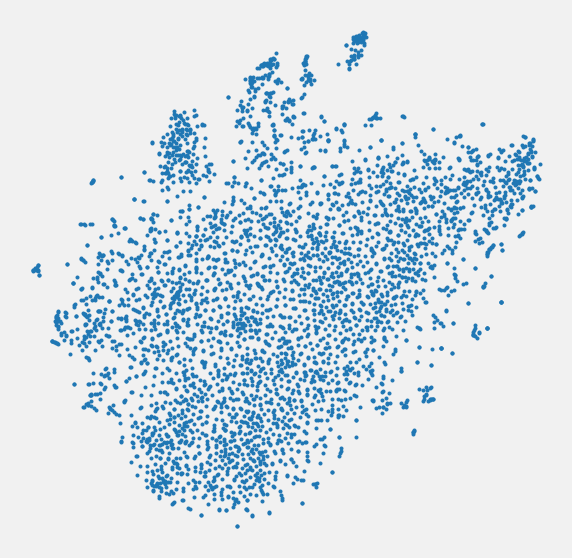

In [80]:
pl.plot(twodproj[:,0], twodproj[:,1], '.')
pl.axis('off');

In [81]:
np.unique(scaledgenes) #restituisce gli elementi unici dell'array


array([-9.76, -9.36, -8.67, ...,  8.36,  9.06,  9.09])

In [82]:
def calICVar(X, labels):
    """calculates the intracluster variance
    input 
    X:  an NxM-dimensional feature vecture for N observcations and M features
    labels: an N dimensional vector of labels
    """
    icvar = 0
    for n in np.unique(labels):
        #print (n, X[labels == n].std() ** 2)
        icvar += np.sum((X[labels == n] - X[labels == n].mean())**2)
        #X[labels == n].var() 
    print("intra cluster variance for {} clusters: {:.2f}".format(n, icvar))
    return icvar

In [83]:
#from sklearn.cluster  import KMeans
#nmaxc = 10
#nc = []

#for i in range(1, nmaxc + 1):
#  c = KMeans(n_clusters=i, random_state=123).fit(scaledgenes)
#  nc.append(c.inertia_)
#  print("i.c. variance with {} clusters {:.2f}".format(i, c.inertia_))
#pl.plot(range(1, nmaxc + 1), nc)

#pl.xlabel("numbe of clusters")
#pl.ylabel("total intracluster variance");

intra cluster variance for 1 clusters: 256360.48
intra cluster variance for 2 clusters: 236862.37
intra cluster variance for 3 clusters: 237828.18
intra cluster variance for 4 clusters: 238002.49
intra cluster variance for 5 clusters: 232119.18
intra cluster variance for 6 clusters: 232423.39
intra cluster variance for 7 clusters: 229885.73
intra cluster variance for 8 clusters: 227175.74


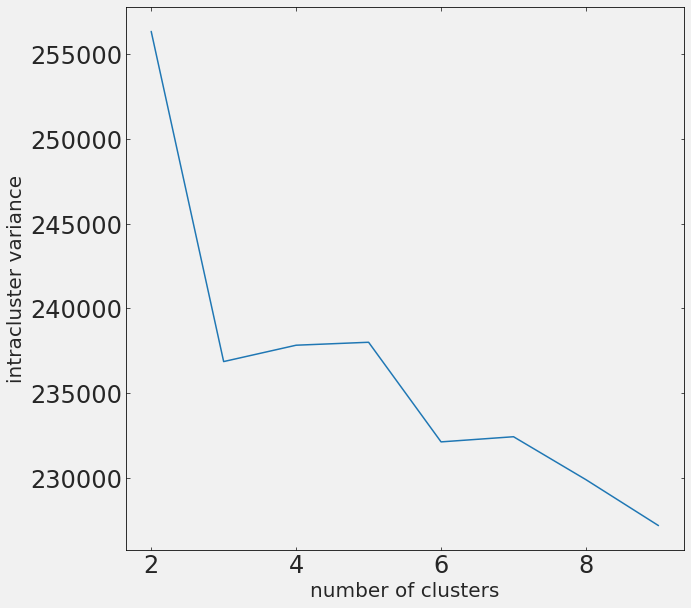

In [84]:
np.random.seed(123)
tv = []
for i in range(2, 10):
    km = skl.cluster.k_means(scaledgenes, i)
    tv.append(calICVar(scaledgenes, km[1]))

pl.plot(range(2,10), tv)
pl.xlabel("number of clusters")
pl.ylabel("intracluster variance");



In [85]:
Nclust = 3

In [86]:
#c = cluster.KMeans(n_clusters=3).fit(scaledgenes)
#c.labels_/ c.n_clusters
#pl.scatter(twodproj[:,0], twodproj[:,1], c.labels_/ c.n_clusters, alpha=0.5)
#pl.axis('off')
#pl.colorbar();

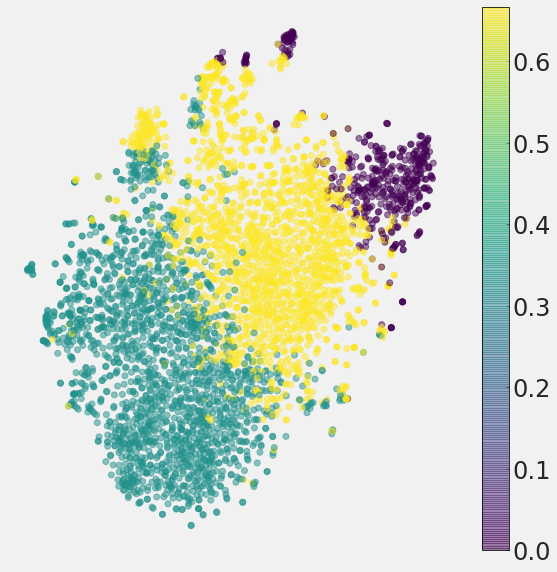

In [87]:
#plots dont need to look exactly like mine
geneclustersKM = cluster.KMeans(n_clusters=Nclust).fit(scaledgenes)
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersKM.labels_/ geneclustersKM.n_clusters, alpha=0.5)
pl,axis('off')
pl.colorbar();

In [88]:
geneclustersAg = skl.cluster.AgglomerativeClustering(linkage="ward", affinity='euclidean')
geneclustersAg.fit(scaledgenes)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [90]:
Z = linkage(scaledgenes, 'ward')

Text(0.5, 1.0, 'Agglomerative clustering linkage: Ward')

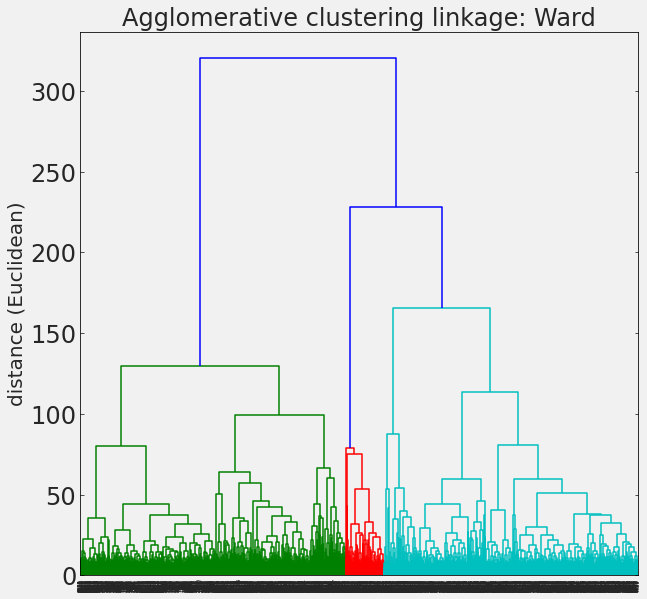

In [91]:
dendrogram(Z);
pl.ylabel("distance (Euclidean)");
pl.title("Agglomerative clustering linkage: Ward")

Repeat with a different linkage and comment on differences 

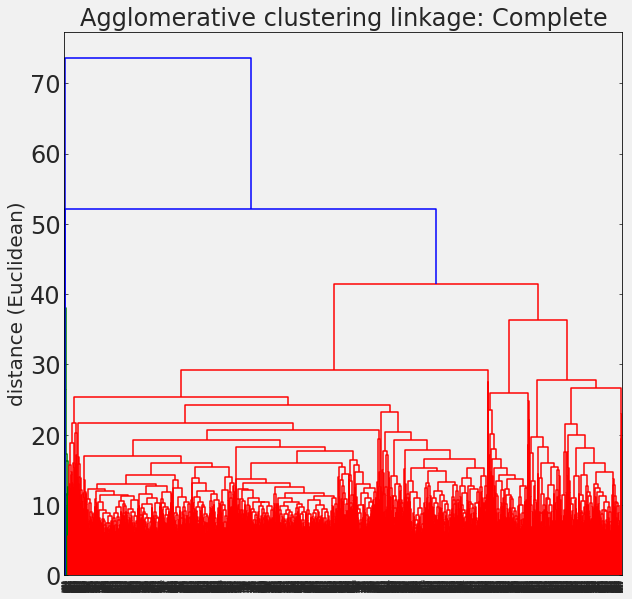

In [92]:
Z = linkage(scaledgenes, 'complete')
dendrogram(Z)
pl.ylabel("distance (Euclidean)");
pl.title("Agglomerative clustering linkage: Complete");


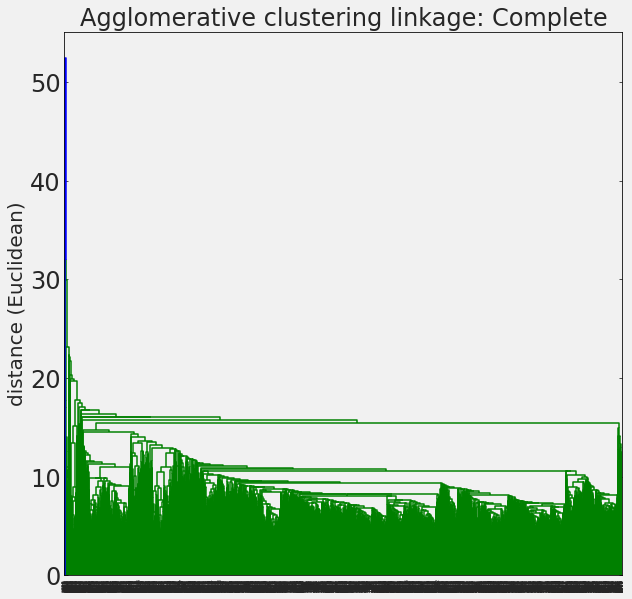

In [93]:
Z = linkage(scaledgenes, 'average')
dendrogram(Z)
pl.ylabel("distance (Euclidean)");
pl.title("Agglomerative clustering linkage: Complete");

In [94]:
geneclustersAg = skl.cluster.AgglomerativeClustering(linkage="ward", affinity='euclidean')
geneclustersAg.fit(scaledgenes)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

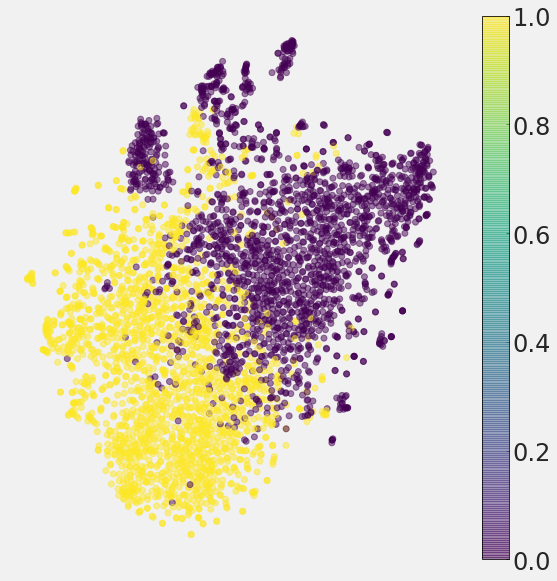

In [95]:
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersAg.labels_, alpha=0.5)
pl.axis('off')
pl.colorbar();


In [96]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=Nclust,
                                                     linkage="complete", affinity='euclidean')
geneclustersAg.fit(scaledgenes)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)

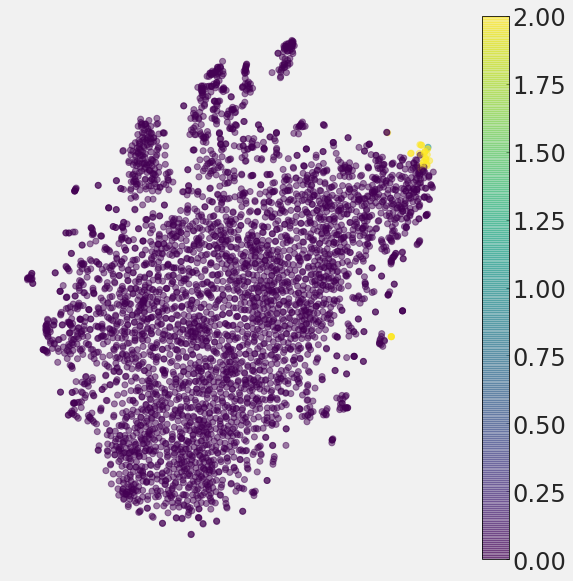

In [97]:
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersAg.labels_, alpha=0.5)
pl.axis('off')
pl.colorbar();

In [98]:
geneclustersAg = skl.cluster.AgglomerativeClustering(n_clusters=Nclust,
                                                     linkage="average", affinity='euclidean')
geneclustersAg.fit(scaledgenes)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3)

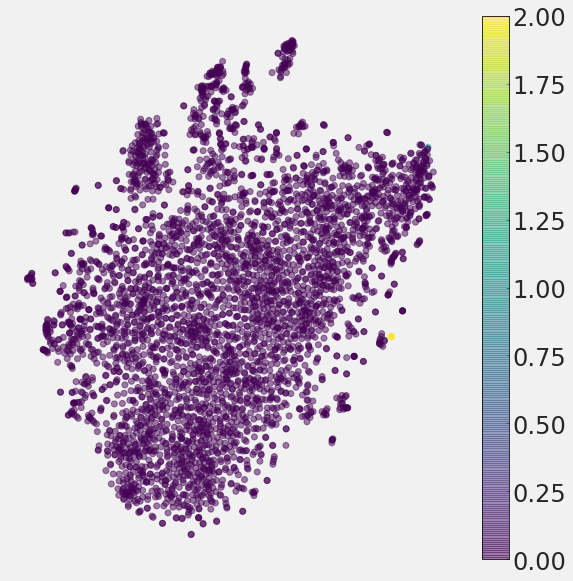

In [99]:
pl.scatter(twodproj[:,0], twodproj[:,1], c=geneclustersAg.labels_, alpha=0.5)
pl.axis('off')
pl.colorbar();